# 0. DATA Before QUAM

In [172]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import toolz as tz
import os 
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
print(os.getcwd())
print(os.getcwd())
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets/Solar")
os.chdir("/content/drive/MyDrive/solar_data/")
files_dir = "/content/drive/MyDrive/solar_data/"
filename1 = files_dir + "Plant_1_Generation_Data.csv"
print(filename1)
print(os.getcwd())
filename2 = files_dir + "Plant_2_Generation_Data.csv"
filename3 = files_dir + "Plant_1_Weather_Sensor_Data.csv"
filename4 = files_dir + "Plant_2_Weather_Sensor_Data.csv"

/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data
/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data
/content/drive/MyDrive/solar_data/Plant_1_Generation_Data.csv
/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data


In [174]:
df_plant1 = pd.read_csv(filename1, parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant2 = pd.read_csv(filename2,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [175]:
df_weather1 = pd.read_csv(filename3,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather2 = pd.read_csv(filename4,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather12 = pd.concat([df_weather1,df_weather2],axis=0)
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 352.2+ KB


In [176]:
timeinfoplant1 = df_plant1['DATE_TIME'].dt.time
dateinfoplant1= df_plant1['DATE_TIME'].dt.date

timeinfoplant2 = df_plant2['DATE_TIME'].dt.time
dateinfoplant2= df_plant2['DATE_TIME'].dt.date

#df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values)
df_plant1['TIME'] = timeinfoplant1
#df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values)
df_plant2['TIME'] = timeinfoplant2
df_plant1
pd.to_datetime(df_plant1['DATE'])
pd.to_datetime(df_plant2['DATE'])
df_plant12= pd.concat([df_plant1,df_plant2],axis = 0)
pd.to_datetime(df_plant12['DATE_TIME'])
df_plant12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
 7   DATE         136476 non-null  datetime64[ns]
 8   TIME         136476 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 10.4+ MB


In [177]:
pd.to_datetime(df_weather12['DATE_TIME'])
timeinfoweather12 = df_weather12['DATE_TIME'].dt.time
dateinfoweather12= df_weather12['DATE_TIME'].dt.date
df_weather12['DATE'] = pd.to_datetime(dateinfoweather12.values)
df_weather12['TIME'] = timeinfoweather12
pd.to_datetime(df_weather12['DATE'])
pd.to_datetime(df_weather12['DATE_TIME'])
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
 6   DATE                 6441 non-null   datetime64[ns]
 7   TIME                 6441 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 452.9+ KB


In [178]:
result12 = pd.merge(df_plant12,df_weather12, how ="left", on=["DATE","TIME","PLANT_ID"])
result12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

In [179]:
result12.info()


list =['DATE_TIME_x', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',\
       'TOTAL_YIELD', 'DATE', 'TIME', 'DATE_TIME_y', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE', \
       'MODULE_TEMPERATURE', 'IRRADIATION']
list1 = ['DATE_TIME_x', 'PLANT_ID','SOURCE_KEY_x', 'DC_POWER', 'AC_POWER','DAILY_YIELD','DATE', 'TIME','AMBIENT_TEMPERATURE', \
       'MODULE_TEMPERATURE', 'IRRADIATION']       
#fig = px.scatter(result12,)
#fig = px.line(result12, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD')
#fig.show()

#fig = px.line(result12, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

# Solar Power Models for regression

## 1.Predict Total Daily yield for both plants(all inverters) date-wise

In [180]:
result_plant = result12.groupby(['PLANT_ID','SOURCE_KEY_x','DATE']).agg({'DC_POWER': 'max', 'AC_POWER': 'max', 'DAILY_YIELD': 'max', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model1 = result_plant.groupby(['PLANT_ID','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'sum', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model1['PLANT_ID']=result_plant_Model1['PLANT_ID'].astype(int)
result_plant_Model1

#print(result_plant_Model1[result_plant_Model1['PLANT_ID']==4135001] .describe())
#print(result_plant_Model1[result_plant_Model1['PLANT_ID']==4136001] .describe())

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE
0,4135001,2020-05-15,259813.285720,25352.546429,137473.000000,0.893661,55.030613
1,4135001,2020-05-16,247614.321430,24171.389285,142114.000000,0.812241,54.232746
2,4135001,2020-05-17,280906.124990,27394.117857,165106.000000,0.997904,63.145582
3,4135001,2020-05-18,283058.500000,27601.919643,117738.000000,0.971481,53.936739
4,4135001,2020-05-19,252049.357140,24604.667857,149637.125000,0.835832,51.847742
...,...,...,...,...,...,...,...
63,4136001,2020-06-13,23706.720000,23141.830476,120462.590476,0.927124,51.008646
64,4136001,2020-06-14,25367.231429,24755.933333,135946.600000,0.921356,52.985789
65,4136001,2020-06-15,21533.939524,21034.184286,119852.309524,0.829677,48.458500
66,4136001,2020-06-16,23225.593333,22690.253333,122253.800000,0.768459,46.364629


### Plots

In [181]:
fig = px.scatter(result_plant_Model1, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [182]:
fig = px.scatter_3d(result_plant, x='IRRADIATION', y='DATE', z='DAILY_YIELD',
              color='PLANT_ID')
fig.show()

In [183]:
import datetime as dt
result_plant_Model1['DATE'] = pd.to_datetime(result_plant_Model1['DATE'])
result_plant_Model1['DATE_NUM']=result_plant_Model1['DATE'].map(dt.datetime.toordinal)

In [184]:
result_plant_Model1

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,DATE_NUM
0,4135001,2020-05-15,259813.285720,25352.546429,137473.000000,0.893661,55.030613,737560
1,4135001,2020-05-16,247614.321430,24171.389285,142114.000000,0.812241,54.232746,737561
2,4135001,2020-05-17,280906.124990,27394.117857,165106.000000,0.997904,63.145582,737562
3,4135001,2020-05-18,283058.500000,27601.919643,117738.000000,0.971481,53.936739,737563
4,4135001,2020-05-19,252049.357140,24604.667857,149637.125000,0.835832,51.847742,737564
...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,23706.720000,23141.830476,120462.590476,0.927124,51.008646,737589
64,4136001,2020-06-14,25367.231429,24755.933333,135946.600000,0.921356,52.985789,737590
65,4136001,2020-06-15,21533.939524,21034.184286,119852.309524,0.829677,48.458500,737591
66,4136001,2020-06-16,23225.593333,22690.253333,122253.800000,0.768459,46.364629,737592


In [185]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model1_Std =result_plant_Model1.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DATE_NUM"]
for feature in features:
  result_plant_Model1_Std[feature] = scaler.fit_transform(result_plant_Model1_Std[[feature]].values)
display(result_plant_Model1_Std)

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,DATE_NUM
0,4135001,2020-05-15,259813.285720,25352.546429,137473.000000,-0.477481,55.030613,-1.681836
1,4135001,2020-05-16,247614.321430,24171.389285,142114.000000,-1.126236,54.232746,-1.579906
2,4135001,2020-05-17,280906.124990,27394.117857,165106.000000,0.353112,63.145582,-1.477977
3,4135001,2020-05-18,283058.500000,27601.919643,117738.000000,0.142575,53.936739,-1.376047
4,4135001,2020-05-19,252049.357140,24604.667857,149637.125000,-0.938261,51.847742,-1.274118
...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,23706.720000,23141.830476,120462.590476,-0.210857,51.008646,1.274118
64,4136001,2020-06-14,25367.231429,24755.933333,135946.600000,-0.256817,52.985789,1.376047
65,4136001,2020-06-15,21533.939524,21034.184286,119852.309524,-0.987304,48.458500,1.477977
66,4136001,2020-06-16,23225.593333,22690.253333,122253.800000,-1.475082,46.364629,1.579906


### Linear Regression

In [186]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(result_plant_Model1_Std, test_size=0.4,shuffle = True)
X_train = df_train.iloc[:, [5,7]]
X_train.info()
#isna()
X_test = df_test.iloc[:, [5,7]]

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['DAILY_YIELD']
y_test = df_test['DAILY_YIELD']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 55 to 57
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IRRADIATION  40 non-null     float64
 1   DATE_NUM     40 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes


In [187]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

print("b : ", linear_regressor.intercept_)
print("w :", linear_regressor.coef_)

b :  144320.80946322728
w : [11328.06551274   358.0565779 ]


#### Losses

In [188]:
from sklearn import metrics
yhat_train = linear_regressor.predict(X_train)
yhat_test = linear_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 374986381.5581549
RMSE on test data: 516010228.2830815
MAE on training data: 15796.307187924374
MAE on test data: 18316.516622506013
R-squared on training data: 0.32100383108067343
R-squared on test data: 0.07531242100190827


#### Visualization

In [ ]:
x_vis_1_range = np.linspace(X_train['DATE_NUM'].min(), X_train['DATE_NUM'].max(), 100 )
x_vis_2_range = np.linspace(X_train['IRRADIATION'].min(), X_train['IRRADIATION'].max(), 100 )

XX_vis_1, XX_vis_2 = np.meshgrid(x_vis_1_range, x_vis_2_range)
X_vis = np.c_[XX_vis_1.flatten(), XX_vis_2.flatten()]
grid_shape = XX_vis_1.shape
column_shape = XX_vis_1.flatten().shape

X_vis_b = np.c_[X_vis]
X_vis_b

y_vis_b = linear_regressor.predict(X_vis_b)
YY_vis = y_vis_b.reshape(grid_shape)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X_train['DATE_NUM'],
                          y=X_train['IRRADIATION'],
                          z=y_train.to_numpy(),
                          mode='markers',
                          marker=dict(colorscale='Teal',
                                      opacity=0.75
                                     )
                         )
            )
fig.add_trace(go.Surface(x=x_vis_1_range,
                        y=x_vis_2_range,
                        z=YY_vis, 
                        showscale=False
                       )
            )

fig.update_layout(scene=dict(xaxis_title="IRRADIATION",
                            yaxis_title="NUMERIC DATE",
                            zaxis_title="DAILY YIELD"
                           ),
                 showlegend=False
                )

fig.show()

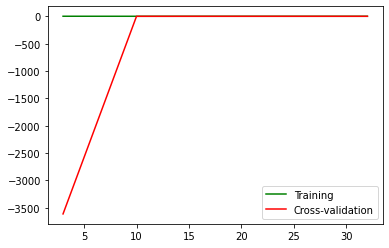

In [195]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

training_sizes, training_scores, validation_scores = learning_curve(
    estimator = linear_regressor,
    X = X_train,
    y = y_train,
    scoring = 'r2'
   
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r')
plt.legend((line1, line2), ('Training', 'Cross-validation'))

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
lambda_ridge = 0.1
ridge_regressor = Ridge(alpha=lambda_ridge)
ridge_regressor.fit(X_train, y_train)

print("b :", ridge_regressor.intercept_)
print("w :", ridge_regressor.coef_)

b : -0.009086401051830294
w : [ 0.43577154 -0.1559148 ]


#### Visualization

In [ ]:
x_vis_1_range = np.linspace(X_train['DATE_NUM'].min(), X_train['DATE_NUM'].max(), 100 )
x_vis_2_range = np.linspace(X_train['IRRADIATION'].min(), X_train['IRRADIATION'].max(), 100 )

XX_vis_1, XX_vis_2 = np.meshgrid(x_vis_1_range, x_vis_2_range)
X_vis = np.c_[XX_vis_1.flatten(), XX_vis_2.flatten()]
grid_shape = XX_vis_1.shape
column_shape = XX_vis_1.flatten().shape

X_vis_b = np.c_[X_vis]
X_vis_b

y_vis_b = ridge_regressor.predict(X_vis_b)
YY_vis = y_vis_b.reshape(grid_shape)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X_train['DATE_NUM'],
                          y=X_train['IRRADIATION'],
                          z=y_train.to_numpy(),
                          mode='markers',
                          marker=dict(colorscale='Teal',
                                      opacity=0.75
                                     )
                         )
            )
fig.add_trace(go.Surface(x=x_vis_1_range,
                        y=x_vis_2_range,
                        z=YY_vis, 
                        showscale=False
                       )
            )

fig.update_layout(scene=dict(xaxis_title="IRRADIATION",
                            yaxis_title="NUMERIC DATE",
                            zaxis_title="DAILY YIELD"
                           ),
                 showlegend=False
                )

fig.show()

#### Losses

In [ ]:
from sklearn import metrics
yhat_train = ridge_regressor.predict(X_train)
yhat_test = ridge_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 0.7036534649257981
RMSE on test data: 0.9407571932185528
MAE on training data: 0.671555815821849
MAE on test data: 0.8292779533215099
R-squared on training data: 0.23697805955548845
R-squared on test data: 0.19201778921703394


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lambda_ridge = 0.1
lasso_regressor = Lasso(alpha=lambda_ridge)
lasso_regressor.fit(X_train, y_train)

print("b :", lasso_regressor.intercept_)
print("w :", lasso_regressor.coef_)

b : -0.023863607472627682
w : [ 0.29984668 -0.09409515]


#### Visualization

#### Losses

In [ ]:
from sklearn import metrics
yhat_train = lasso_regressor.predict(X_train)
yhat_test = lasso_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 0.9026849088536543
RMSE on test data: 0.5613295252375763
MAE on training data: 0.7874305253349513
MAE on test data: 0.6056297880568502
R-squared on training data: 0.16474715758187453
R-squared on test data: 0.22577784631711917


## 2.Predict Total DC_Power Prediction for both plants(all inverters) date-wise

In [217]:
result_plant = result12.groupby(['PLANT_ID','SOURCE_KEY_x','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model2 = result_plant.groupby(['PLANT_ID','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'sum', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model2['PLANT_ID']=result_plant_Model2['PLANT_ID'].astype(int)
result_plant_Model2

print(result_plant_Model2[result_plant_Model2['PLANT_ID']==4135001] .describe())
print(result_plant_Model2[result_plant_Model2['PLANT_ID']==4136001] .describe())

        PLANT_ID      DC_POWER  ...  IRRADIATION  MODULE_TEMPERATURE
count       34.0  3.400000e+01  ...    34.000000           34.000000
mean   4135001.0  6.366873e+06  ...     0.988749           57.402581
std          0.0  8.856043e+05  ...     0.109278            4.809615
min    4135001.0  4.812549e+06  ...     0.702585           46.405418
25%    4135001.0  5.586186e+06  ...     0.938212           54.010741
50%    4135001.0  6.461499e+06  ...     1.017896           58.449591
75%    4135001.0  7.133442e+06  ...     1.047535           61.474481
max    4135001.0  7.898965e+06  ...     1.221652           65.545714

[8 rows x 6 columns]
        PLANT_ID       DC_POWER  ...  IRRADIATION  MODULE_TEMPERATURE
count       34.0      34.000000  ...    34.000000           34.000000
mean   4136001.0  491212.627888  ...     0.918425           56.013877
std          0.0   77862.006343  ...     0.134043            6.476113
min    4136001.0  342752.854139  ...     0.537373           39.878408
25%    

In [218]:
import datetime as dt
result_plant_Model2['DATE'] = pd.to_datetime(result_plant_Model2['DATE'])
result_plant_Model2['DATE_NUM']=result_plant_Model2['DATE'].map(dt.datetime.toordinal)

In [219]:
for i, row in result_plant_Model2.iterrows():
    if(row['PLANT_ID'] == 4135001 ):
       result_plant_Model2.loc[i,'DC_POWER_Scaled']=result_plant_Model2.loc[i,'DC_POWER']/14
    if(row['PLANT_ID'] == 4136001 ):
       result_plant_Model2.loc[i,'DC_POWER_Scaled']=result_plant_Model2.loc[i,'DC_POWER']

### Plots

In [220]:
fig = px.scatter(result_plant_Model2, x="IRRADIATION", y="DC_POWER", title='DATE vs DC POWER', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [221]:
fig = px.scatter(result_plant_Model2, x="IRRADIATION", y="DC_POWER_Scaled", title='DATE vs DC POWER-Scaled', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [222]:
result_plant_Model2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,DATE_NUM,DC_POWER_Scaled
count,6.800000e+01,6.800000e+01,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,4.135501e+06,3.429043e+06,551530.645673,145005.358456,0.953587,56.708229,737576.500000,472994.633225
std,5.037175e+02,3.024722e+06,107904.901569,23770.109688,0.126436,5.704378,9.883652,72758.113734
min,4.135001e+06,3.427529e+05,335847.822161,97966.000000,0.537373,39.878408,737560.000000,342752.854139
25%,4.135001e+06,4.980483e+05,484788.177585,127725.750000,0.920588,53.362182,737568.000000,411175.124524
50%,4.135501e+06,2.739578e+06,543139.888333,141905.000000,0.967692,58.187383,737576.500000,480854.722424
75%,4.136001e+06,6.441092e+06,639199.288688,162750.875000,1.039160,60.784911,737585.000000,521543.251808
max,4.136001e+06,7.898965e+06,771576.161312,193770.000000,1.221652,66.635953,737593.000000,666607.630952


In [223]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model2_Std =result_plant_Model2.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DATE_NUM"]
for feature in features:
  result_plant_Model2_Std[feature] = scaler.fit_transform(result_plant_Model2_Std[[feature]].values)
display(result_plant_Model2_Std)

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,DATE_NUM,DC_POWER_Scaled
0,4135001,2020-05-15,5.627239e+06,550830.959402,137473.000000,-0.477481,55.030613,-1.681836,401945.653062
1,4135001,2020-05-16,5.806138e+06,568359.821428,142114.000000,-1.126236,54.232746,-1.579906,414724.108420
2,4135001,2020-05-17,6.759595e+06,660975.389285,165106.000000,0.353112,63.145582,-1.477977,482828.181972
3,4135001,2020-05-18,4.812549e+06,470969.708929,117738.000000,0.142575,53.936739,-1.376047,343753.466836
4,4135001,2020-05-19,5.437955e+06,532250.491070,149637.125000,-0.938261,51.847742,-1.274118,388425.346515
...,...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,4.553058e+05,445507.764286,120462.590476,-0.210857,51.008646,1.274118,455305.790476
64,4136001,2020-06-14,5.059115e+05,495073.503333,135946.600000,-0.256817,52.985789,1.376047,505911.451905
65,4136001,2020-06-15,4.109989e+05,402322.124286,119852.309524,-0.987304,48.458500,1.477977,410998.909524
66,4136001,2020-06-16,4.808101e+05,470830.427143,122253.800000,-1.475082,46.364629,1.579906,480810.068571


### Linear Regression

In [224]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(result_plant_Model2_Std, test_size=0.4,shuffle = True)
X_train = df_train.iloc[:, [5,7]]
#X_train = df_train.iloc[:, [5]]
X_train.info()
#isna()
X_test = df_test.iloc[:, [5,7]]

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['DC_POWER_Scaled']
y_test = df_test['DC_POWER_Scaled']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 37 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IRRADIATION  40 non-null     float64
 1   DATE_NUM     40 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes


In [225]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

print("b : ", linear_regressor.intercept_)
print("w :", linear_regressor.coef_)

b :  471584.64286268567
w : [ 19930.27632238 -12708.08402281]


In [226]:
from sklearn import metrics
yhat_train = linear_regressor.predict(X_train)
yhat_test = linear_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

RMSE on training data: 4808286891.111667
RMSE on test data: 4188188258.675538


#### Visualization

In [227]:
x_vis_1_range = np.linspace(X_train['DATE_NUM'].min(), X_train['DATE_NUM'].max(), 100 )
x_vis_2_range = np.linspace(X_train['IRRADIATION'].min(), X_train['IRRADIATION'].max(), 100 )

XX_vis_1, XX_vis_2 = np.meshgrid(x_vis_1_range, x_vis_2_range)
X_vis = np.c_[XX_vis_1.flatten(), XX_vis_2.flatten()]
grid_shape = XX_vis_1.shape
column_shape = XX_vis_1.flatten().shape

X_vis_b = np.c_[X_vis]
X_vis_b

y_vis_b = linear_regressor.predict(X_vis_b)
YY_vis = y_vis_b.reshape(grid_shape)

In [228]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X_train['DATE_NUM'],
                          y=X_train['IRRADIATION'],
                          z=y_train.to_numpy(),
                          mode='markers',
                          marker=dict(colorscale='Teal',
                                      opacity=0.75
                                     )
                         )
            )
fig.add_trace(go.Surface(x=x_vis_1_range,
                        y=x_vis_2_range,
                        z=YY_vis, 
                        showscale=False
                       )
            )

fig.update_layout(scene=dict(xaxis_title="IRRADIATION",
                            yaxis_title="NUMERIC DATE",
                            zaxis_title="DC-Power"
                           ),
                 showlegend=False
                )

fig.show()

#### Losses

In [229]:
from sklearn import metrics
yhat_train = linear_regressor.predict(X_train)
yhat_test = linear_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 4808286891.111667
RMSE on test data: 4188188258.675538
MAE on training data: 59413.75619826547
MAE on test data: 47815.58941243199
R-squared on training data: 0.11701231060590422
R-squared on test data: 0.14311602586286754


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning:

Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 36 instead of 51).

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with le

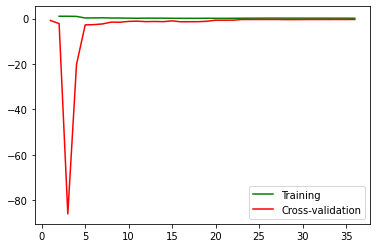

In [230]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

training_sizes, training_scores, validation_scores = learning_curve(
    estimator = linear_regressor,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.01, 1.0, 51),
    cv = 10
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r')
plt.legend((line1, line2), ('Training', 'Cross-validation'))

### Ridge Regression

In [231]:
from sklearn.linear_model import Ridge
lambda_ridge = 1
ridge_regressor = Ridge(alpha=lambda_ridge)
ridge_regressor.fit(X_train, y_train)

print("b :", ridge_regressor.intercept_)
print("w :", ridge_regressor.coef_)

b : 471620.91235870804
w : [ 19496.17650724 -12445.40736995]


In [232]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=ridge_regressor, param_grid=dict(alpha=np.logspace(-10, 0, 5)),scoring='r2')
grid.fit(X_train,  y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-10, 3.16227766e-08, 1.00000000e-05, 3.16227766e-03,
       1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)
-0.14924909466869501
1.0


In [233]:
from sklearn import metrics
yhat_train = ridge_regressor.predict(X_train)
yhat_test = ridge_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 4808580201.225897
RMSE on test data: 4189060950.8605
MAE on training data: 59509.4713709129
MAE on test data: 47790.82379227614
R-squared on training data: 0.11695844750956552
R-squared on test data: 0.14293747707244497


In [ ]:
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning:

Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 36 instead of 51).

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with le

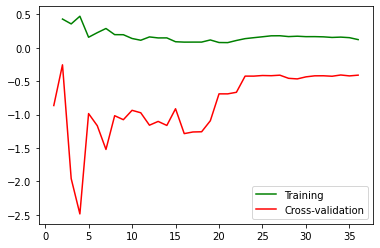

In [234]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

training_sizes, training_scores, validation_scores = learning_curve(
    estimator = ridge_regressor,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.01, 1.0, 51), scoring = 'r2',
    cv = 10
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r')
plt.legend((line1, line2), ('Training', 'Cross-validation'))

###Lasso

In [235]:
from sklearn.linear_model import Lasso
lambda_ridge = 1
lasso_regressor = Lasso(alpha=lambda_ridge)
lasso_regressor.fit(X_train, y_train)

print("b :", lasso_regressor.intercept_)
print("w :", lasso_regressor.coef_)

b : 471584.71252315555
w : [ 19929.44257501 -12707.16280677]


In [236]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=lasso_regressor, param_grid=dict(alpha=np.logspace(-10, 0, 5)),scoring='r2')
grid.fit(X_train,  y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-10, 3.16227766e-08, 1.00000000e-05, 3.16227766e-03,
       1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)
-0.15432670101543602
1e-10


In [237]:
from sklearn import metrics
yhat_train = lasso_regressor.predict(X_train)
yhat_test = lasso_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

mae_train = metrics.mean_absolute_error(y_train, yhat_train)
print("MAE on training data:", mae_train)
mae_test = metrics.mean_absolute_error(y_test, yhat_test)
print("MAE on test data:", mae_test)

r_squared_train = metrics.r2_score(y_train, yhat_train)
print("R-squared on training data:", r_squared_train)
r_squared_test = metrics.r2_score(y_test, yhat_test)
print("R-squared on test data:", r_squared_test)

RMSE on training data: 4808286892.859367
RMSE on test data: 4188189065.510914
MAE on training data: 59414.013301599654
MAE on test data: 47815.50543955212
R-squared on training data: 0.11701231028495873
R-squared on test data: 0.14311586078807614


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning:

Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 36 instead of 51).

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/lo

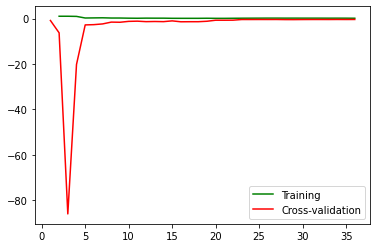

In [238]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

training_sizes, training_scores, validation_scores = learning_curve(
    estimator = lasso_regressor,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.01, 1.0, 51), scoring = 'r2',
    cv = 10
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r')
plt.legend((line1, line2), ('Training', 'Cross-validation'))

## Predict Total DC_Power Prediction for both plants per invertor each day

In [ ]:
result_plant = result12.groupby(['PLANT_ID','SOURCE_KEY_x','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model3 = result_plant.groupby(['PLANT_ID','SOURCE_KEY_x','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'sum', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model3['PLANT_ID']=result_plant_Model3['PLANT_ID'].astype(int)
result_plant_Model3

print(result_plant_Model3[result_plant_Model3['PLANT_ID']==4135001].describe())
print(result_plant_Model3[result_plant_Model3['PLANT_ID']==4136001] .describe())

In [ ]:
import datetime as dt
result_plant_Model3['DATE'] = pd.to_datetime(result_plant_Model3['DATE'])
result_plant_Model3['DATE_NUM']=result_plant_Model3['DATE'].map(dt.datetime.toordinal)

In [ ]:
for i, row in result_plant_Model3.iterrows():
    if(row['PLANT_ID'] == 4135001 ):
       result_plant_Model3.loc[i,'DC_POWER_Scaled']=result_plant_Model3.loc[i,'DC_POWER']/11.4
    if(row['PLANT_ID'] == 4136001 ):
       result_plant_Model3.loc[i,'DC_POWER_Scaled']=result_plant_Model3.loc[i,'DC_POWER']

In [ ]:
fig = px.scatter(result_plant_Model3, x="DATE", y="DC_POWER", title='DATE vs DC POWER', color = 'SOURCE_KEY_x',hover_data=['PLANT_ID'])
fig.show()

In [ ]:
fig = px.scatter(result_plant_Model3, x="DATE", y="DC_POWER_Scaled", title='DATE vs DC POWER', color = 'SOURCE_KEY_x',hover_data=['PLANT_ID'])
fig.show()

In [ ]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model3_Std =result_plant_Model3.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DC_POWER_Scaled","DATE_NUM"]
for feature in features:
  result_plant_Model3_Std[feature] = scaler.fit_transform(result_plant_Model3_Std[[feature]].values)
display(result_plant_Model3_Std)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(result_plant_Model3_Std, test_size=0.3)
X_train = df_train.iloc[:, [5,8]]
X_train.info()
#isna()
X_test = df_test.iloc[:, [5,8]]

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['DC_POWER_Scaled']
y_test = df_test['DC_POWER_Scaled']

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

print("b : ", linear_regressor.intercept_)
print("w :", linear_regressor.coef_)

In [ ]:
from sklearn import metrics
yhat_train = linear_regressor.predict(X_train)
yhat_test = linear_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)

## Predict Daily Yield for both plants per invertor each day and Time

In [ ]:
result_plant = result12.groupby(['PLANT_ID','SOURCE_KEY_x','DATE_TIME_x']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
#result_plant_Model3 = result_plant.groupby(['PLANT_ID','DATE_TIME_x']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'sum', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' }).reset_index()
result_plant_Model4 = result_plant
result_plant_Model4['PLANT_ID']=result_plant_Model4['PLANT_ID'].astype(int)
result_plant_Model4

,PLANT_ID,SOURCE_KEY_x,DATE_TIME_x,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE
0,4135001,1BY6WEcLGh8j5v7,2020-05-15 00:00:00,0.0,0.0,0.0,0.0,22.857507
1,4135001,1BY6WEcLGh8j5v7,2020-05-15 00:15:00,0.0,0.0,0.0,0.0,22.761668
2,4135001,1BY6WEcLGh8j5v7,2020-05-15 00:30:00,0.0,0.0,0.0,0.0,22.592306
3,4135001,1BY6WEcLGh8j5v7,2020-05-15 00:45:00,0.0,0.0,0.0,0.0,22.360852
4,4135001,1BY6WEcLGh8j5v7,2020-05-15 01:00:00,0.0,0.0,0.0,0.0,22.165423
...,...,...,...,...,...,...,...,...
136471,4136001,xoJJ8DcxJEcupym,2020-06-17 22:45:00,0.0,0.0,4316.0,0.0,22.856201
136472,4136001,xoJJ8DcxJEcupym,2020-06-17 23:00:00,0.0,0.0,4316.0,0.0,22.744190
136473,4136001,xoJJ8DcxJEcupym,2020-06-17 23:15:00,0.0,0.0,4316.0,0.0,22.492245
136474,4136001,xoJJ8DcxJEcupym,2020-06-17 23:30:00,0.0,0.0,4316.0,0.0,22.373909


In [ ]:
import datetime as dt
result_plant_Model4['DATE_TIME_x'] = pd.to_datetime(result_plant_Model4['DATE_TIME_x'])
result_plant_Model4['DATETIME_NUM']=result_plant_Model4['DATE_TIME_x'].map(dt.datetime.toordinal)

In [ ]:
#(np.isnan(result_plant_Model4['IRRADIATION'])== True)
for i, row in result_plant_Model4.iterrows():
    if(np.isnan(row['IRRADIATION'])== True):
       print(result_plant_Model4.loc[i])
       result_plant_Model4.loc[i,'IRRADIATION'] = result_plant_Model4.loc[i-1,'IRRADIATION']

    

PLANT_ID                          4135001
SOURCE_KEY_x              1IF53ai7Xc0U56Y
DATE_TIME_x           2020-06-03 14:00:00
DC_POWER                             7003
AC_POWER                            685.8
DAILY_YIELD                          5601
IRRADIATION                           NaN
MODULE_TEMPERATURE                    NaN
DATETIME_NUM                       737579
Name: 4895, dtype: object
PLANT_ID                          4135001
SOURCE_KEY_x              adLQvlD726eNBSB
DATE_TIME_x           2020-06-03 14:00:00
DC_POWER                             7204
AC_POWER                            705.4
DAILY_YIELD                          5685
IRRADIATION                           NaN
MODULE_TEMPERATURE                    NaN
DATETIME_NUM                       737579
Name: 32997, dtype: object
PLANT_ID                          4135001
SOURCE_KEY_x              wCURE6d3bPkepu2
DATE_TIME_x           2020-06-03 14:00:00
DC_POWER                             7545
AC_POWER               

In [ ]:
fig = px.scatter(result_plant_Model4, x="IRRADIATION", y="DAILY_YIELD", title='DATE-TIME vs DAILY -YIELD', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [ ]:
print(result_plant_Model4[result_plant_Model4['PLANT_ID']==4135001].describe())
print(result_plant_Model4[result_plant_Model4['PLANT_ID']==4136001] .describe())

In [ ]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model4_Std =result_plant_Model4.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DAILY_YIELD","DATETIME_NUM"]
for feature in features:
  result_plant_Model4_Std[feature] = scaler.fit_transform(result_plant_Model4_Std[[feature]].values)
display(result_plant_Model4_Std)

In [ ]:
np.any(np.isnan(result_plant_Model4_Std['IRRADIATION']))

In [ ]:
np.all(np.isfinite(result_plant_Model4_Std['IRRADIATION']))

In [ ]:
fig = px.scatter(result_plant_Model4_Std, x="IRRADIATION", y="DAILY_YIELD", title='DATE-TIME vs DAILY -YIELD', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(result_plant_Model4_Std, test_size=0.3)
X_train = df_train.iloc[:, [6,8]]
X_train.info()
#isna()
X_test = df_test.iloc[:, [6,8]]

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['DAILY_YIELD']
y_test = df_test['DAILY_YIELD']

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

print("b : ", linear_regressor.intercept_)
print("w :", linear_regressor.coef_)

In [ ]:
from sklearn import metrics
yhat_train = linear_regressor.predict(X_train)
yhat_test = linear_regressor.predict(X_test)

rmse_train = metrics.mean_squared_error(y_train, yhat_train)
print("RMSE on training data:", rmse_train)
rmse_test = metrics.mean_squared_error(y_test, yhat_test)
print("RMSE on test data:", rmse_test)